# MNIST

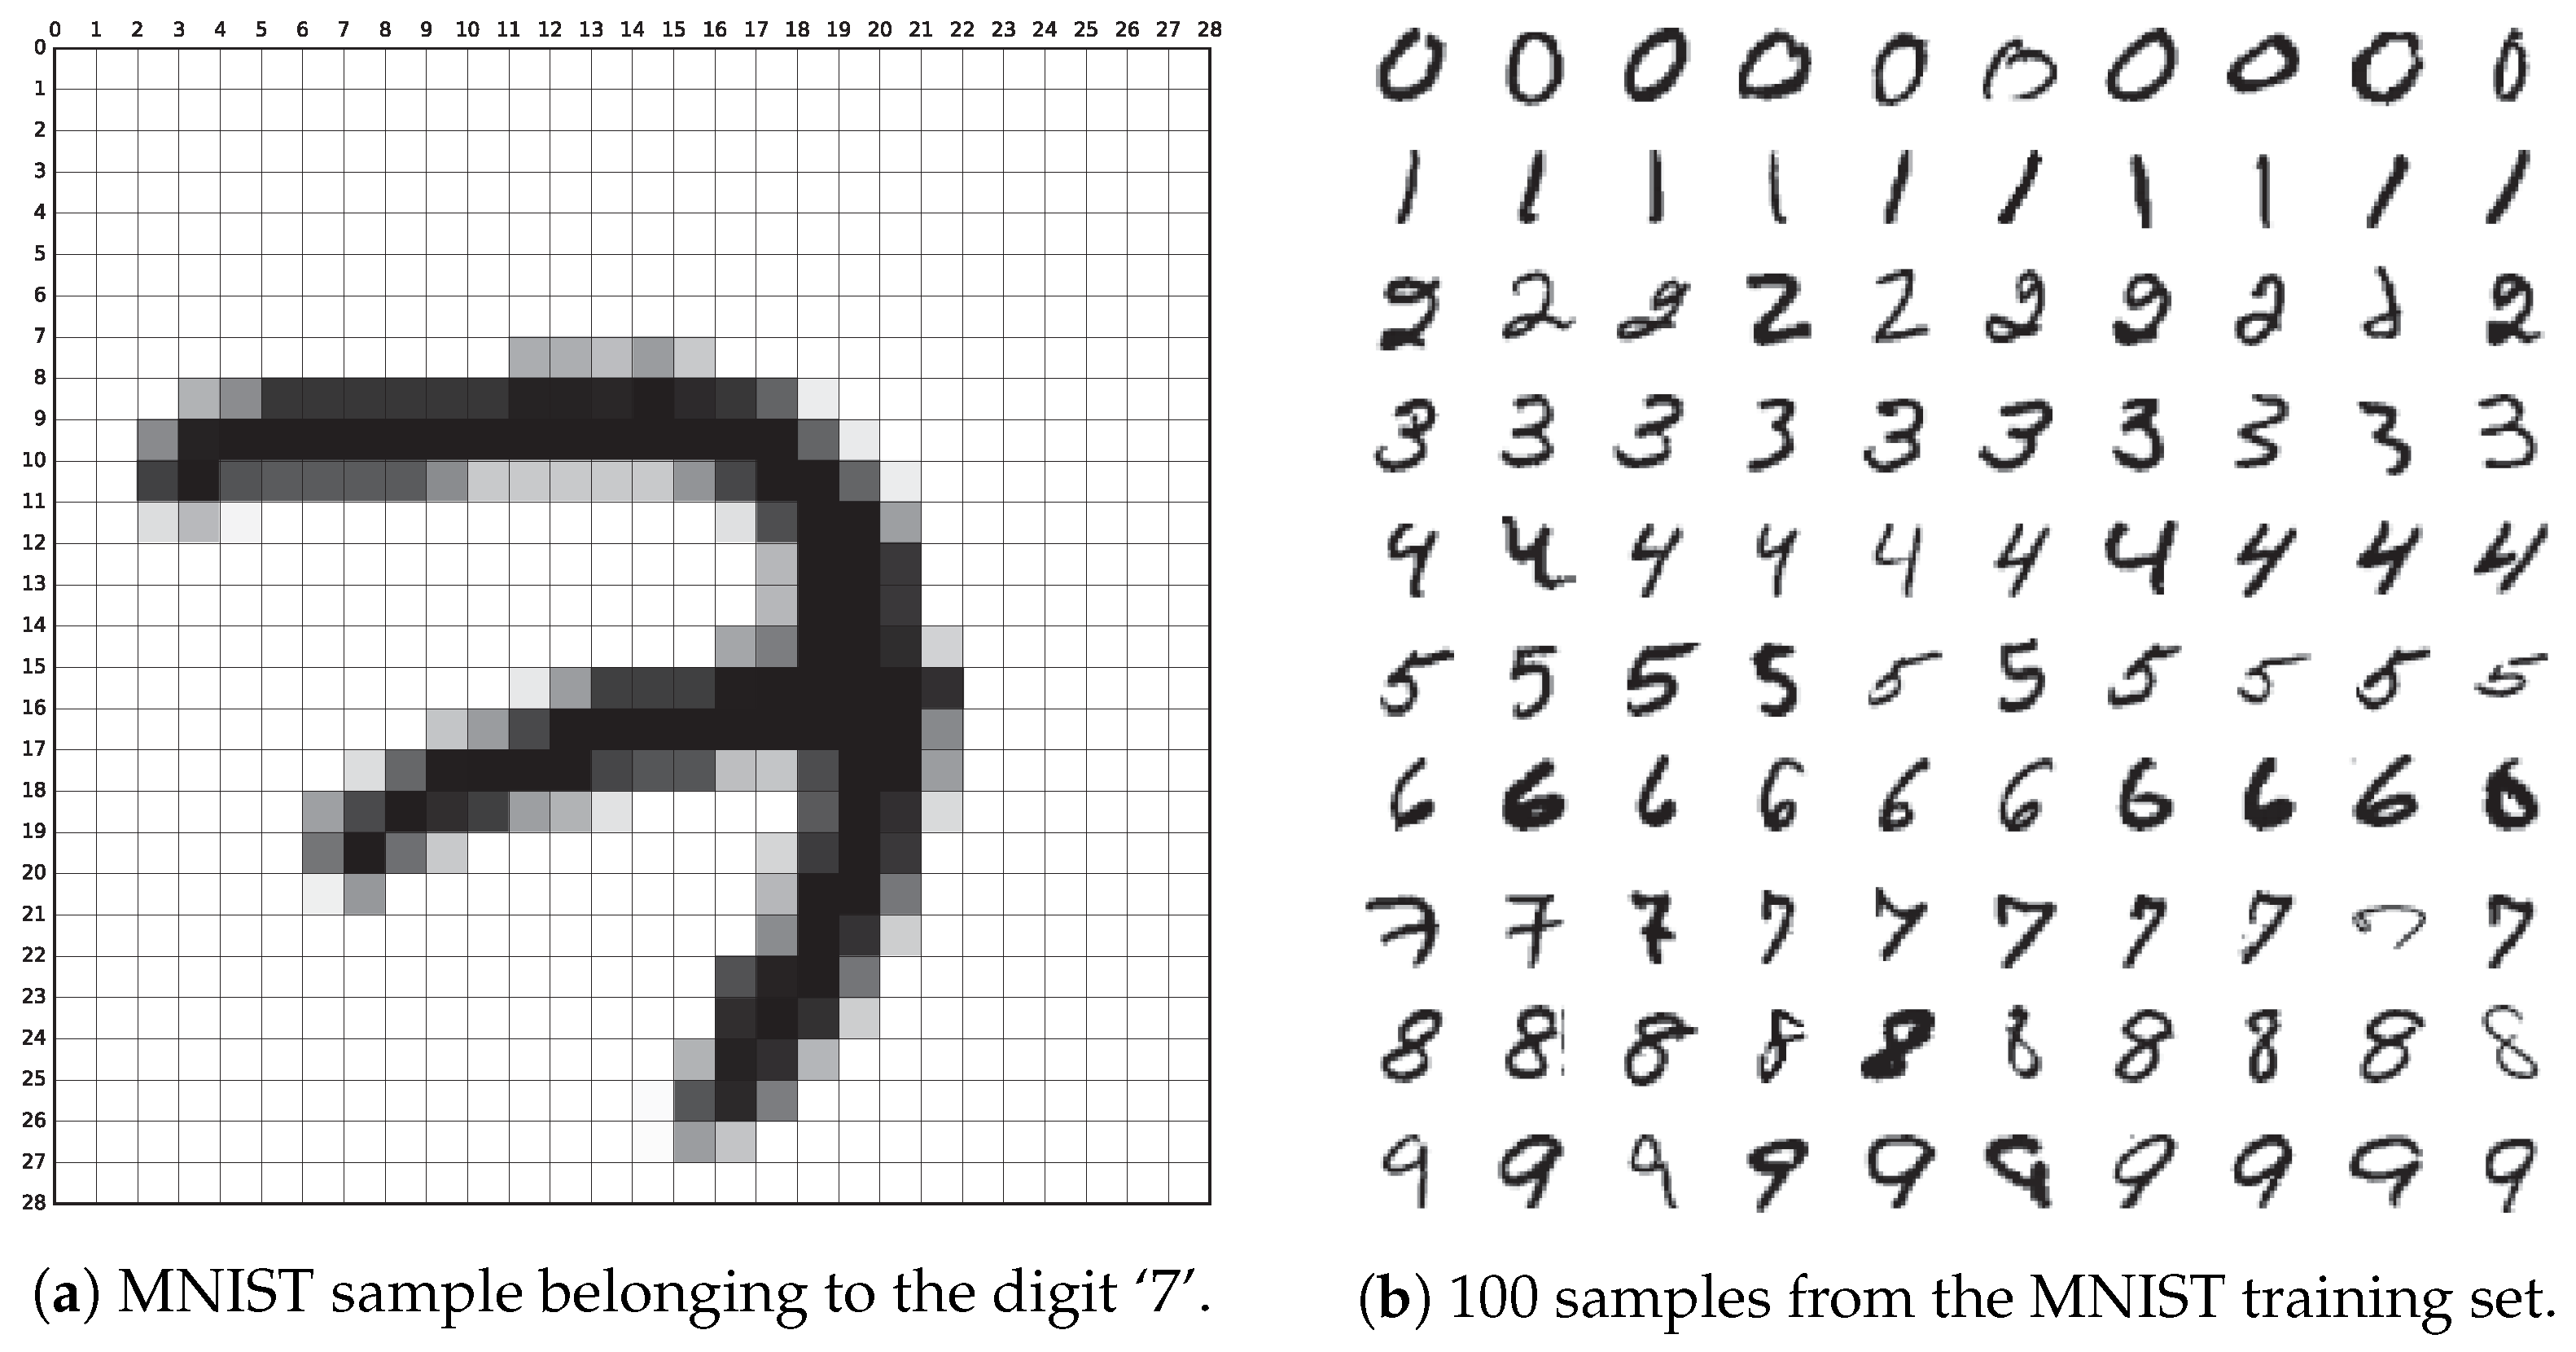

###References

1. [Keras for Beginners: Building Your First Neural Network (Victor Zhou)](https://victorzhou.com/blog/keras-neural-network-tutorial/)
2. [Baldominos, A.; Saez, Y.; Isasi, P. A Survey of Handwritten Character Recognition with MNIST and EMNIST. Appl. Sci. 2019, 9, 3169. https://doi.org/10.3390/app9153169 ](https://www.mdpi.com/2076-3417/9/15/3169#cite)
3. [Neural Networks From Scratch (Victor Zhou)](https://victorzhou.com/series/neural-networks-from-scratch/)
4. [Intro to CNNs - Part 1 (Victor Zhou)](https://victorzhou.com/blog/intro-to-cnns-part-1/)
5. [Xavier Initialization](https://www.quora.com/What-is-an-intuitive-explanation-of-the-Xavier-Initialization-for-Deep-Neural-Networks)
6. [Intro to CNNs - Part 2 (Victor Zhou)](https://victorzhou.com/blog/intro-to-cnns-part-2/)

Description: Each image in the MNIST dataset is 28x28 and contains a centered, grayscale digit. Implementation based on a fast foward NN, CNN and RNN. A direct comparison is made in the end.



### Importing Libraries

In [ ]:
import numpy as np
import mnist
from tensorflow import keras 
from tensorflow.keras.models import Sequential # instantiating sequential model
from tensorflow.keras.layers import Dense 
from tensorflow.keras.utils import to_categorical # One-to-one hot-encoding of integers

In [ ]:
pip install mnist

### Importing dataset

In [ ]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()
#print(train_images.shape) # (60000, 28, 28)
#print(train_labels.shape) # (60000, )

## Feedforward Neural Network

### Preprocessing

In [ ]:
#Normalize the pixel values from [0, 255] to [-0.5, 0.5] 
train_images = (train_images/255) - 0.5
test_images = (test_images/255) - 0.5

#Flatten each 28x28 into a 784 dimensional vector. New input for the NN.
train_images = train_images.reshape((-1,784))
test_images = test_images.reshape((-1,784))

#print(train_images.shape) # (60000, 784)
#print(test_images.shape) # (10000, 784)

### Model Training

In [ ]:
model = Sequential([
  Dense(64, activation = 'relu', input_shape = (784,)), 
  Dense(64, activation = 'relu'), 
  Dense(10, activation='softmax'),
])

model.compile(
  optimizer = 'adam', # Extension of Stochastic Gradient Descent 
  loss = 'categorical_crossentropy',
  metrics = ['accuracy'],
) # Calculates how often predictions equal labels.

model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3654 - accuracy: 0.8909
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1835 - accuracy: 0.9442
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1371 - accuracy: 0.9575
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1148 - accuracy: 0.9638
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0998 - accuracy: 0.9692


The Softmax is particularly useful ([see this](https://victorzhou.com/blog/softmax/)) for classification problems in terms of probabilities instead of binary labels.

Question: How do you effectively choose activation functions, loss functions, metrics and optimizers?

1.  [A](https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/). For AFs you can choose based on how the function image (Relu - extends to infinity, Logistic/Tanh is limited)
2.   The Cross-Entropy loss is useful when using the Softmax AF [link text](https://machinelearningmastery.com/cross-entropy-for-machine-learning/). 



### Model Testing

In [ ]:
model.evaluate(
  test_images,
  to_categorical(test_labels),
)

313/313 [==============================] - 1s 2ms/step - loss: 0.1171 - accuracy: 0.9627


[0.11708322912454605, 0.9627000093460083]

The model has achieved a 0.117 test loss and 96.3% test accuracy.

### Model Usage and Extensions

In [ ]:
model.save_weights('model.h5') # Saving model weights

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

# Load the model's saved weights.
model.load_weights('model.h5')

In [ ]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:6])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]
# The np.argmax is necessary to select the corret probability (out of 10 from softmax)

# Check our predictions against the ground truths.
print(test_labels[:6]) # [7, 2, 1, 0, 4]

[7 2 1 0 4 1]
[7 2 1 0 4 1]


Tuning the learning rate from Adam's optimizer algorithm. How about the batch size and number of epochs?

In [ ]:
from tensorflow.keras.optimizers import Adam

model = Sequential([
  Dense(64, activation = 'relu', input_shape = (784,)), 
  Dense(64, activation = 'relu'), 
  Dense(10, activation='softmax'),
])

model.compile(
  optimizer=Adam(learning_rate=0.0005),  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=64,
)

model.evaluate(
  test_images,
  to_categorical(test_labels),
)


Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.4567 - accuracy: 0.8684
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2406 - accuracy: 0.9281
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1898 - accuracy: 0.9437
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1565 - accuracy: 0.9535
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1335 - accuracy: 0.9600
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1168 - accuracy: 0.9647
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1055 - accuracy: 0.9681
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0946 - accuracy: 0.9710
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0863 - accuracy: 0.9746
Epoch 10/10
313/313 [==============================] - 1s 1ms/step - loss: 0.1077 - accuracy: 0.9671

[0.10766259580850601, 0.9671000242233276]

A smaller (greater) learning rate for Adam's optimizer increases (decreases) the accuracy of the algorithm. An opposite situation occurs for the loss function. Smaller LRs implicate into more CPU time. Increasing the epochs and batch sizes may also increase (decrease) the accuracy (loss).

In [ ]:
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(10, activation='softmax'),
])

model.compile(
  optimizer=Adam(learning_rate=0.0005),  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=64,
)

model.evaluate(
  test_images,
  to_categorical(test_labels),
)

Epoch 1/10
938/938 [==============================] - 3s 2ms/step - loss: 1.9789 - accuracy: 0.2506
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 1.6165 - accuracy: 0.3920
Epoch 3/10
938/938 [==============================] - 1s 2ms/step - loss: 1.4625 - accuracy: 0.4596
Epoch 4/10
938/938 [==============================] - 1s 1ms/step - loss: 1.3757 - accuracy: 0.4809
Epoch 5/10
938/938 [==============================] - 1s 1ms/step - loss: 1.3184 - accuracy: 0.4914
Epoch 6/10
938/938 [==============================] - 1s 1ms/step - loss: 1.2790 - accuracy: 0.5029
Epoch 7/10
938/938 [==============================] - 1s 1ms/step - loss: 1.2497 - accuracy: 0.5163
Epoch 8/10
938/938 [==============================] - 1s 1ms/step - loss: 1.2248 - accuracy: 0.5322
Epoch 9/10
938/938 [==============================] - 1s 1ms/step - loss: 1.2013 - accuracy: 0.5554
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 1.1561 - accuracy: 0.5767

[1.1561295986175537, 0.57669997215271]

Adding more (less) layers and nodes seem to increase the accuracy, but there's a certain stagnation to the accuracy that we can reach.

Dropout layers are useful for avoiding overfitting: "The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.". This works like a numerical almost like a numerical cutoff. Notwithstanding, it may also decrease the final performance's quality.

In [ ]:
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dropout(0.5),  Dense(64, activation='relu'),
  Dropout(0.5),  Dense(10, activation='softmax'),
])

model.compile(
  optimizer=Adam(learning_rate=0.0005),  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=64,
)

model.evaluate(
  test_images,
  to_categorical(test_labels),
)

Epoch 1/10
938/938 [==============================] - 5s 4ms/step - loss: 1.1504 - accuracy: 0.6097
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.6810 - accuracy: 0.7880
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.5902 - accuracy: 0.8197
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.5479 - accuracy: 0.8354
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.5121 - accuracy: 0.8458
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4953 - accuracy: 0.8499
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4847 - accuracy: 0.8535
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4685 - accuracy: 0.8597
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4528 - accuracy: 0.8642
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.2110 - accuracy: 0.9371

[0.2109977751970291, 0.9370999932289124]

In [ ]:
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
  Dense(64, activation='sigmoid', input_shape=(784,)),
  Dropout(0.5),  Dense(64, activation='sigmoid'),
  Dropout(0.5),  Dense(10, activation='softmax'),
])

model.compile(
  optimizer=Adam(learning_rate=0.0005),  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=64,
)

model.evaluate(
  test_images,
  to_categorical(test_labels),
)

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 1.6183 - accuracy: 0.4503
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.8761 - accuracy: 0.7274
Epoch 3/10
938/938 [==============================] - 2s 3ms/step - loss: 0.6841 - accuracy: 0.7939
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.6007 - accuracy: 0.8213
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.5524 - accuracy: 0.8369
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.5202 - accuracy: 0.8484
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4940 - accuracy: 0.8553
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4746 - accuracy: 0.8625
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4580 - accuracy: 0.8674
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.2314 - accuracy: 0.9313

[0.23140431940555573, 0.9312999844551086]

Changing the activation function to this case doesn't seem to present significant changes as well.

### Test Validation

Using the testing dataset for validation during training may be useful for identify possible overfitting. 

In [ ]:
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
  validation_data=(test_images, to_categorical(test_labels)))

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4327 - accuracy: 0.8731 - val_loss: 0.2152 - val_accuracy: 0.9362
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4141 - accuracy: 0.8797 - val_loss: 0.2098 - val_accuracy: 0.9387
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4079 - accuracy: 0.8807 - val_loss: 0.2059 - val_accuracy: 0.9387
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3931 - accuracy: 0.8863 - val_loss: 0.1973 - val_accuracy: 0.9417
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3842 - accuracy: 0.8885 - val_loss: 0.1965 - val_accuracy: 0.9427


## Convolutional Neural Network

### Preprocessing

In [ ]:
import numpy as np
import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout

train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

### Model Training and Testing

cnn-dims-3.svg

In [ ]:
num_filters = 8
filter_size = 3
pool_size = 2

#model = Sequential([
#  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
#    Conv2D(num_filters, filter_size),
#  MaxPooling2D(pool_size=pool_size),
#  Flatten(),
#  Dense(10, activation='softmax'),
#])

#model = Sequential([
#  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
#  MaxPooling2D(pool_size=pool_size),
#  Dropout(0.5),  Flatten(),
#  Dense(10, activation='softmax'),
#])

model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(64, activation='relu'),  Dense(10, activation='softmax'),
])

model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=3,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/3
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2472 - accuracy: 0.9258 - val_loss: 0.1219 - val_accuracy: 0.9608
Epoch 2/3
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0966 - accuracy: 0.9708 - val_loss: 0.0786 - val_accuracy: 0.9743
Epoch 3/3
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0670 - accuracy: 0.9792 - val_loss: 0.0721 - val_accuracy: 0.9776


Adding more depthness and fully-conected layers between the Convolutional outputs and final Softmax layer may increase the final perfomance.

In [ ]:
# These can be changed, too!
num_filters = 8
filter_size = 3

model = Sequential([
  # See https://keras.io/layers/convolutional/#conv2d for more info.
  Conv2D(
    num_filters,
    filter_size,
    input_shape=(28, 28, 1),
    strides=2,    padding='same',    activation='relu',  ),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
    Conv2D(num_filters, filter_size),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])


model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=3,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/3
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2537 - accuracy: 0.9252 - val_loss: 0.1198 - val_accuracy: 0.9649
Epoch 2/3
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0995 - accuracy: 0.9702 - val_loss: 0.0810 - val_accuracy: 0.9749
Epoch 3/3
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0775 - accuracy: 0.9769 - val_loss: 0.0797 - val_accuracy: 0.9754


### Model Usage and Extensions

In [ ]:
model.save_weights('cnn.h5')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

num_filters = 8
filter_size = 3
pool_size = 2

# Build the model.
model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

# Load the model's saved weights.
model.load_weights('cnn.h5')

# Predict on the first 5 test images.
predictions = model.predict(test_images[:10])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) 

# Check our predictions against the ground truths.
print(test_labels[:10]) 

[7 2 1 0 4 1 4 9 6 9]
[7 2 1 0 4 1 4 9 5 9]


# Intro to Neural Networks

Description: Based on a table of participants with weight and height, our NN will try to identify the gender of the participants.

network3.svg

In [ ]:
import numpy as np

def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)
  '''
  def __init__(self):
    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Arrays for plot
    self.e1 = np.empty(100) # epochs
    self.l1 = np.empty(100) # losses
    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues, e1, l1):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
    epochs = 1000 # number of times to loop through the entire dataset
    dim = int(epochs/10)

    i = -1
    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron o1
        d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
        d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
        d_ypred_d_b3 = deriv_sigmoid(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

        # Neuron h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
        d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
        d_h1_d_b1 = deriv_sigmoid(sum_h1)

        # Neuron h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
        d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
        d_h2_d_b2 = deriv_sigmoid(sum_h2)

        # --- Update weights and biases following the stochastic gradient descent
        # Neuron h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neuron h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neuron o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Calculate total loss at the end of each epoch
      if epoch % 10 == 0:
        i+=1
        #print(i)
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        self.e1[i] = epoch
        self.l1[i] = loss
        #print("Epoch %d loss: %.3f" % (epoch, loss))
        #print()
    #print(self.l1)
    #return , loss_g

epoch_g = []
loss_g = []
# Define dataset
data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])
# 1st entry = Weight / 2nd entry = Height.
# Here they are normalized by - 135 and -66 

all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

epoch_g = np.empty(100)
loss_g = np.empty(100)
# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues, epoch_g, loss_g)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import rc

#rcParams.update({'figure.autolayout': True})

# Plot label font configuration
#rc('font',**{'family':'serif','serif':['Helvetica']})
##rc('text', usetex=True)

#font = {'family' : 'normal',
#        'weight' : 'bold',
#        'size'   : 45}

#font2 = {'family' : 'normal',
#        'weight' : 'bold',
#        'size'   : 18}

plt.plot(epoch_g, loss_g)
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [ ]:
# Make some predictions
emily = np.array([-7, -3]) # 128 pounds, 63 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches
print("Emily: %.3f" % network.feedforward(emily)) # F
print("Frank: %.3f" % network.feedforward(frank)) # M

Emily: 0.966
Frank: 0.040


# Intro to CNNs

CNNs are basically just neural networks that use Convolutional layers, a.k.a. Conv layers, which are based on the mathematical operation of convolution. Conv layers consist of a set of filters, which you can think of as just 2d matrices of numbers. In general, convolution helps us look for specific localized image features (like edges) that we can use later in the network.


Often times, we’d prefer to have the output image be the same size as the input image. To do this, we add zeros around the image so we can overlay the filter in more places. This is called “same” padding, since the input and output have the same dimensions. Not using any padding, which is what we’ve been doing and will continue to do for this post, is sometimes referred to as “valid” padding.

Neighboring pixels in images tend to have similar values, so conv layers will typically also produce similar values for neighboring pixels in outputs. As a result, much of the information contained in a conv layer’s output is redundant. For example, if we use an edge-detecting filter and find a strong edge at a certain location, chances are that we’ll also find relatively strong edges at locations 1 pixel shifted from the original one. However, these are all the same edge! We’re not finding anything new. Pooling layers solve this problem. 

cnn-dims-3.svg

In [ ]:
import numpy as np

class Conv3x3:
  # A Convolution layer using 3x3 filters.

  def __init__(self, num_filters):
    self.num_filters = num_filters

    # filters is a 3d array with dimensions (num_filters, 3, 3)
    # We divide by 9 to reduce the variance of our initial values
    self.filters = np.random.randn(num_filters, 3, 3) / 9


  def iterate_regions(self, image):
    '''
    Generates all possible 3x3 image regions using valid padding.
    - image is a 2d numpy array
    '''
    h, w = image.shape

    for i in range(h - 2):
      for j in range(w - 2):
        im_region = image[i:(i + 3), j:(j + 3)]
        yield im_region, i, j

  def forward(self, input):
    '''
    Performs a forward pass of the conv layer using the given input.
    Returns a 3d numpy array with dimensions (h, w, num_filters).
    - input is a 2d numpy array
    '''
    h, w = input.shape
    output = np.zeros((h - 2, w - 2, self.num_filters))

    for im_region, i, j in self.iterate_regions(input):
      output[i, j] = np.sum(im_region * self.filters, axis=(1, 2))
    return output


class MaxPool2:
  # A Max Pooling layer using a pool size of 2.

  def iterate_regions(self, image):
    '''
    Generates non-overlapping 2x2 image regions to pool over.
    - image is a 2d numpy array
    '''
    h, w, _ = image.shape
    new_h = h // 2
    new_w = w // 2

    for i in range(new_h):
      for j in range(new_w):
        im_region = image[(i * 2):(i * 2 + 2), (j * 2):(j * 2 + 2)]
        yield im_region, i, j

  def forward(self, input):
    '''
    Performs a forward pass of the maxpool layer using the given input.
    Returns a 3d numpy array with dimensions (h / 2, w / 2, num_filters).
    - input is a 3d numpy array with dimensions (h, w, num_filters)
    '''
    h, w, num_filters = input.shape
    output = np.zeros((h // 2, w // 2, num_filters))

    for im_region, i, j in self.iterate_regions(input):
      output[i, j] = np.amax(im_region, axis=(0, 1))
    return output

class Softmax:
  # A standard fully-connected layer with softmax activation.

  def __init__(self, input_len, nodes):
    # We divide by input_len to reduce the variance of our initial values
    self.weights = np.random.randn(input_len, nodes) / input_len
    self.biases = np.zeros(nodes)


  def forward(self, input):
    '''
    Performs a forward pass of the softmax layer using the given input.
    Returns a 1d numpy array containing the respective probability values.
    - input can be any array with any dimensions.
    '''
    self.last_input_shape = input.shape

    input = input.flatten()
    self.last_input = input
    
    input_len, nodes = self.weights.shape

    totals = np.dot(input, self.weights) + self.biases
    self.last_totals = totals
    exp = np.exp(totals)
    return exp / np.sum(exp, axis=0)

  def backprop(self, d_L_d_out, learn_rate):   
    '''
    Performs a backward pass of the softmax layer.
    Returns the loss gradient for this layer's inputs.
    - d_L_d_out is the loss gradient for this layer's outputs.
    - learn_rate is a float    '''
    # We know only 1 element of d_L_d_out will be nonzero
    for i, gradient in enumerate(d_L_d_out):
      if gradient == 0:
        continue

      # e^totals
      t_exp = np.exp(self.last_totals)

      # Sum of all e^totals
      S = np.sum(t_exp)

      # Gradients of out[i] against totals
      d_out_d_t = -t_exp[i] * t_exp / (S ** 2)
      d_out_d_t[i] = t_exp[i] * (S - t_exp[i]) / (S ** 2)

      # Gradients of totals against weights/biases/input
      d_t_d_w = self.last_input
      d_t_d_b = 1
      d_t_d_inputs = self.weights

      # Gradients of loss against totals
      d_L_d_t = gradient * d_out_d_t

      # Gradients of loss against weights/biases/input
      d_L_d_w = d_t_d_w[np.newaxis].T @ d_L_d_t[np.newaxis]
      d_L_d_b = d_L_d_t * d_t_d_b
      d_L_d_inputs = d_t_d_inputs @ d_L_d_t

      # Update weights / biases 
      self.weights -= learn_rate * d_L_d_w 
      self.biases -= learn_rate * d_L_d_b  
      return d_L_d_inputs.reshape(self.last_input_shape)

import mnist

# The mnist package handles the MNIST dataset for us!
# Learn more at https://github.com/datapythonista/mnist
# We only use the first 1k testing examples (out of 10k total)
# in the interest of time. Feel free to change this if you want.
test_images = mnist.test_images()[:1000]
test_labels = mnist.test_labels()[:1000]

conv = Conv3x3(8)                  # 28x28x1 -> 26x26x8
pool = MaxPool2()                  # 26x26x8 -> 13x13x8
softmax = Softmax(13 * 13 * 8, 10) # 13x13x8 -> 10

def forward(image, label):
  '''
  Completes a forward pass of the CNN and calculates the accuracy and
  cross-entropy loss.
  - image is a 2d numpy array
  - label is a digit
  '''
  # We transform the image from [0, 255] to [-0.5, 0.5] to make it easier
  # to work with. This is standard practice.
  out = conv.forward((image / 255) - 0.5)
  out = pool.forward(out)
  out = softmax.forward(out)

  # Calculate cross-entropy loss and accuracy. np.log() is the natural log.
  loss = -np.log(out[label])
  acc = 1 if np.argmax(out) == label else 0

  return out, loss, acc

print('MNIST CNN initialized!')

loss = 0
num_correct = 0
for i, (im, label) in enumerate(zip(test_images, test_labels)):
  # Do a forward pass.
  _, l, acc = forward(im, label)
  loss += l
  num_correct += acc

  # Print stats every 100 steps.
  if i % 100 == 99:
    print(
      '[Step %d] Past 100 steps: Average Loss %.3f | Accuracy: %d%%' %
      (i + 1, loss / 100, num_correct)
    )
    loss = 0
    num_correct = 0

MNIST CNN initialized!
[Step 100] Past 100 steps: Average Loss 2.302 | Accuracy: 12%
[Step 200] Past 100 steps: Average Loss 2.302 | Accuracy: 4%
[Step 300] Past 100 steps: Average Loss 2.302 | Accuracy: 8%
[Step 400] Past 100 steps: Average Loss 2.302 | Accuracy: 10%
[Step 500] Past 100 steps: Average Loss 2.302 | Accuracy: 2%
[Step 600] Past 100 steps: Average Loss 2.302 | Accuracy: 10%
[Step 700] Past 100 steps: Average Loss 2.302 | Accuracy: 6%
[Step 800] Past 100 steps: Average Loss 2.302 | Accuracy: 8%
[Step 900] Past 100 steps: Average Loss 2.302 | Accuracy: 8%
[Step 1000] Past 100 steps: Average Loss 2.302 | Accuracy: 7%


With random weight initialization, you’d expect the CNN to be only as good as random guessing. Random guessing would yield 10% accuracy (since there are 10 classes) and a cross-entropy loss of −ln⁡(0.1)=2.302{-\ln(0.1)} = 2.302−ln(0.1)=2.302, which is what we get!

# Intro to RNNs


Here’s what makes a RNN recurrent: it uses the same weights for each step. More specifically, a typical vanilla RNN uses only 3 sets of weights to perform its calculations. One issue with vanilla neural nets (and also CNNs) is that they only work with pre-determined sizes: they take fixed-size inputs and produce fixed-size outputs. RNNs are useful because they let us have variable-length sequences as both inputs and outputs.

many-to-many.svg

In [ ]:
import numpy as np
from numpy.random import randn

# Define dataset
train_data = {
  'good': True,
  'bad': False,
  'happy': True,
  'sad': False,
  'not good': False,
  'not bad': True,
  'not happy': False,
  'not sad': True,
  'very good': True,
  'very bad': False,
  'very happy': True,
  'very sad': False,
  'i am happy': True,
  'this is good': True,
  'i am bad': False,
  'this is bad': False,
  'i am sad': False,
  'this is sad': False,
  'i am not happy': False,
  'this is not good': False,
  'i am not bad': True,
  'this is not sad': True,
  'i am very happy': True,
  'this is very good': True,
  'i am very bad': False,
  'this is very sad': False,
  'this is very happy': True,
  'i am good not bad': True,
  'this is good not bad': True,
  'i am bad not good': False,
  'i am good and happy': True,
  'this is not good and not happy': False,
  'i am not at all good': False,
  'i am not at all bad': True,
  'i am not at all happy': False,
  'this is not at all sad': True,
  'this is not at all happy': False,
  'i am good right now': True,
  'i am bad right now': False,
  'this is bad right now': False,
  'i am sad right now': False,
  'i was good earlier': True,
  'i was happy earlier': True,
  'i was bad earlier': False,
  'i was sad earlier': False,
  'i am very bad right now': False,
  'this is very good right now': True,
  'this is very sad right now': False,
  'this was bad earlier': False,
  'this was very good earlier': True,
  'this was very bad earlier': False,
  'this was very happy earlier': True,
  'this was very sad earlier': False,
  'i was good and not bad earlier': True,
  'i was not good and not happy earlier': False,
  'i am not at all bad or sad right now': True,
  'i am not at all good or happy right now': False,
  'this was not happy and not good earlier': False,
}

test_data = {
  'this is happy': True,
  'i am good': True,
  'this is not happy': False,
  'i am not good': False,
  'this is not bad': True,
  'i am not sad': True,
  'i am very good': True,
  'this is very bad': False,
  'i am very sad': False,
  'this is bad not good': False,
  'this is good and happy': True,
  'i am not good and not happy': False,
  'i am not at all sad': True,
  'this is not at all good': False,
  'this is not at all bad': True,
  'this is good right now': True,
  'this is sad right now': False,
  'this is very bad right now': False,
  'this was good earlier': True,
  'i was not happy and not good earlier': False,
}

# Create the vocabulary.
vocab = list(set([w for text in train_data.keys() for w in text.split(' ')]))
vocab_size = len(vocab)
print('%d unique words found' % vocab_size) # 18 unique words found

# Assign indices to each word.
word_to_idx = { w: i for i, w in enumerate(vocab) }
idx_to_word = { i: w for i, w in enumerate(vocab) }
print(word_to_idx['good']) 


def createInputs(text):
  '''
  Returns an array of one-hot vectors representing the words
  in the input text string.
  - text is a string
  - Each one-hot vector has shape (vocab_size, 1)
  '''
  inputs = []
  for w in text.split(' '):
    v = np.zeros((vocab_size, 1))
    v[word_to_idx[w]] = 1
    inputs.append(v)
  return inputs

class RNN:
  # A Vanilla Recurrent Neural Network.

  def __init__(self, input_size, output_size, hidden_size=64):
    # Weights
    self.Whh = randn(hidden_size, hidden_size) / 1000
    self.Wxh = randn(hidden_size, input_size) / 1000
    self.Why = randn(output_size, hidden_size) / 1000
    # Dividing by 1000 is one way to reduce the initial variance of the weights.

    # Biases
    self.bh = np.zeros((hidden_size, 1))
    self.by = np.zeros((output_size, 1))

  def forward(self, inputs):
        '''
        Perform a forward pass of the RNN using the given inputs.
        Returns the final output and hidden state.
        - inputs is an array of one-hot vectors with shape (input_size, 1).
        '''
        h = np.zeros((self.Whh.shape[0], 1))

        self.last_inputs = inputs  
        self.last_hs = { 0: h }
        # Perform each step of the RNN
        for i, x in enumerate(inputs):
          h = np.tanh(self.Wxh @ x + self.Whh @ h + self.bh)
          self.last_hs[i + 1] = h
        # Compute the output
        y = self.Why @ h + self.by

        return y, h
      
  def backprop(self, d_y, learn_rate=2e-2):   
        '''    Perform a backward pass of the RNN. 
           - d_y (dL/dy) has shape (output_size, 1).  
             - learn_rate is a float.    '''   
        n = len(self.last_inputs)

        # Calculate dL/dWhy and dL/dby.
        d_Why = d_y @ self.last_hs[n].T
        d_by = d_y

        # Initialize dL/dWhh, dL/dWxh, and dL/dbh to zero.
        d_Whh = np.zeros(self.Whh.shape)
        d_Wxh = np.zeros(self.Wxh.shape)
        d_bh = np.zeros(self.bh.shape)

        # Calculate dL/dh for the last h.
        d_h = self.Why.T @ d_y

        # Backpropagate through time.
        for t in reversed(range(n)):
            # An intermediate value: dL/dh * (1 - h^2)
            temp = ((1 - self.last_hs[t + 1] ** 2) * d_h)

            # dL/db = dL/dh * (1 - h^2)
            d_bh += temp
            # dL/dWhh = dL/dh * (1 - h^2) * h_{t-1}
            d_Whh += temp @ self.last_hs[t].T
            # dL/dWxh = dL/dh * (1 - h^2) * x
            d_Wxh += temp @ self.last_inputs[t].T
            # Next dL/dh = dL/dh * (1 - h^2) * Whh
            d_h = self.Whh @ temp

          # Clip to prevent exploding gradients.
        for d in [d_Wxh, d_Whh, d_Why, d_bh, d_by]:
            np.clip(d, -1, 1, out=d)

          # Update weights and biases using gradient descent.
        self.Whh -= learn_rate * d_Whh
        self.Wxh -= learn_rate * d_Wxh
        self.Why -= learn_rate * d_Why
        self.bh -= learn_rate * d_bh
        self.by -= learn_rate * d_by

def softmax(xs):
  # Applies the Softmax Function to the input array.
  return np.exp(xs) / sum(np.exp(xs))

# Initialize our RNN!
rnn = RNN(vocab_size, 2)

inputs = createInputs('i am very good')
out, h = rnn.forward(inputs)
probs = softmax(out)
print(probs) # [[0.50000095], [0.49999905]]
# Loop over each training example
for x, y in train_data.items():
  inputs = createInputs(x)
  target = int(y)

  # Forward
  out, _ = rnn.forward(inputs)
  probs = softmax(out)

  # Build dL/dy
  d_L_d_y = probs 
  d_L_d_y[target] -= 1
  # Backward
  rnn.backprop(d_L_d_y)

import random

def processData(data, backprop=True):
  '''
  Returns the RNN's loss and accuracy for the given data.
  - data is a dictionary mapping text to True or False.
  - backprop determines if the backward phase should be run.
  '''
  items = list(data.items())
  random.shuffle(items)

  loss = 0
  num_correct = 0

  for x, y in items:
    inputs = createInputs(x)
    target = int(y)

    # Forward
    out, _ = rnn.forward(inputs)
    probs = softmax(out)

    # Calculate loss / accuracy
    loss -= np.log(probs[target])
    num_correct += int(np.argmax(probs) == target)

    if backprop:
      # Build dL/dy
      d_L_d_y = probs
      d_L_d_y[target] -= 1

      # Backward
      rnn.backprop(d_L_d_y)

  return loss / len(data), num_correct / len(data)

# Training loop
for epoch in range(1000):
  train_loss, train_acc = processData(train_data)

  if epoch % 100 == 99:
    print('--- Epoch %d' % (epoch + 1))
    print('Train:\tLoss %.3f | Accuracy: %.3f' % (train_loss, train_acc))

    test_loss, test_acc = processData(test_data, backprop=False)
    print('Test:\tLoss %.3f | Accuracy: %.3f' % (test_loss, test_acc))

18 unique words found
16
[[0.50000385]
 [0.49999615]]
--- Epoch 100
Train:	Loss 0.688 | Accuracy: 0.552
Test:	Loss 0.695 | Accuracy: 0.500
--- Epoch 200
Train:	Loss 0.665 | Accuracy: 0.690
Test:	Loss 0.721 | Accuracy: 0.450
--- Epoch 300
Train:	Loss 0.524 | Accuracy: 0.741
Test:	Loss 0.668 | Accuracy: 0.550
--- Epoch 400
Train:	Loss 0.512 | Accuracy: 0.759
Test:	Loss 0.645 | Accuracy: 0.600
--- Epoch 500
Train:	Loss 0.422 | Accuracy: 0.776
Test:	Loss 0.747 | Accuracy: 0.550
--- Epoch 600
Train:	Loss 0.424 | Accuracy: 0.793
Test:	Loss 0.646 | Accuracy: 0.750
--- Epoch 700
Train:	Loss 0.400 | Accuracy: 0.810
Test:	Loss 0.486 | Accuracy: 0.800
--- Epoch 800
Train:	Loss 0.054 | Accuracy: 0.983
Test:	Loss 0.263 | Accuracy: 0.950
--- Epoch 900
Train:	Loss 0.006 | Accuracy: 1.000
Test:	Loss 0.399 | Accuracy: 0.950
--- Epoch 1000
Train:	Loss 0.003 | Accuracy: 1.000
Test:	Loss 0.442 | Accuracy: 0.950


In order to fully calculate the gradient of WxhW_{xh}Wxh​, we’ll need to backpropagate through all timesteps, which is known as Backpropagation Through Time (BPTT):
bptt.svg

After finishing BPTT, we np.clip() gradient values that are below -1 or above 1. This helps mitigate the exploding gradient problem, which is when gradients become very large due to having lots of multiplied terms. Exploding or vanishing gradients are quite problematic for vanilla RNNs - more complex RNNs like LSTMs are generally better-equipped to handle them.
Once all gradients are calculated, we update weights and biases using gradient descent.

# NLP analysis of 

In [ ]:
from tensorflow.keras.preprocessing import text_dataset_from_directory
from tensorflow.strings import regex_replace
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout

def prepareData(dir):
  data = text_dataset_from_directory(dir)
  return data.map(
    lambda text, label: (regex_replace(text, '<br />', ' '), label),
  )

# Assumes you're in the root level of the dataset directory.
# If you aren't, you'll need to change the relative paths here.
train_data = prepareData('./train')
test_data = prepareData('./test')

for text_batch, label_batch in train_data.take(1):
  print(text_batch.numpy()[0])
  print(label_batch.numpy()[0]) # 0 = negative, 1 = positive


model = Sequential()

# ----- 1. INPUT
# We need this to use the TextVectorization layer next.
model.add(Input(shape=(1,), dtype="string"))

# ----- 2. TEXT VECTORIZATION
# This layer processes the input string and turns it into a sequence of
# max_len integers, each of which maps to a certain token.
max_tokens = 1000
max_len = 100
vectorize_layer = TextVectorization(
  # Max vocab size. Any words outside of the max_tokens most common ones
  # will be treated the same way: as "out of vocabulary" (OOV) tokens.
  max_tokens=max_tokens,
  # Output integer indices, one per string token
  output_mode="int",
  # Always pad or truncate to exactly this many tokens
  output_sequence_length=max_len,
)

# Call adapt(), which fits the TextVectorization layer to our text dataset.
# This is when the max_tokens most common words (i.e. the vocabulary) are selected.
train_texts = train_data.map(lambda text, label: text)
vectorize_layer.adapt(train_texts)

model.add(vectorize_layer)

# ----- 3. EMBEDDING
# This layer turns each integer (representing a token) from the previous layer
# an embedding. Note that we're using max_tokens + 1 here, since there's an
# out-of-vocabulary (OOV) token that gets added to the vocab.
model.add(Embedding(max_tokens + 1, 128))

# ----- 4. RECURRENT LAYER
model.add(LSTM(64))

# ----- 5. DENSE HIDDEN LAYER
model.add(Dense(64, activation="relu"))

# ----- 6. OUTPUT
model.add(Dense(1, activation="sigmoid"))


# Compile and train the model.
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(train_data, epochs=10)

model.save_weights('rnn')

model.load_weights('rnn')

# Try the model on our test dataset.
model.evaluate(test_data)

# Should print a very high score like 0.98.
print(model.predict([
  "i loved it! highly recommend it to anyone and everyone looking for a great movie to watch.",
]))

# Should print a very low score like 0.01.
print(model.predict([
  "this was awful! i hated it so much, nobody should watch this. the acting was terrible, the music was terrible, overall it was just bad.",
]))